In [40]:
!pip install scikit-learn

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
%matplotlib inline

In [42]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [43]:
filename = '/content/internet_traffic_hist.csv'
df = pd.read_csv(filename)

In [44]:
df

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


Predicted Internet Traffic in 2020: 2826.84
Exponential Model Parameters: a = 103.3782, b = 1.2468
R-squared: 0.9993


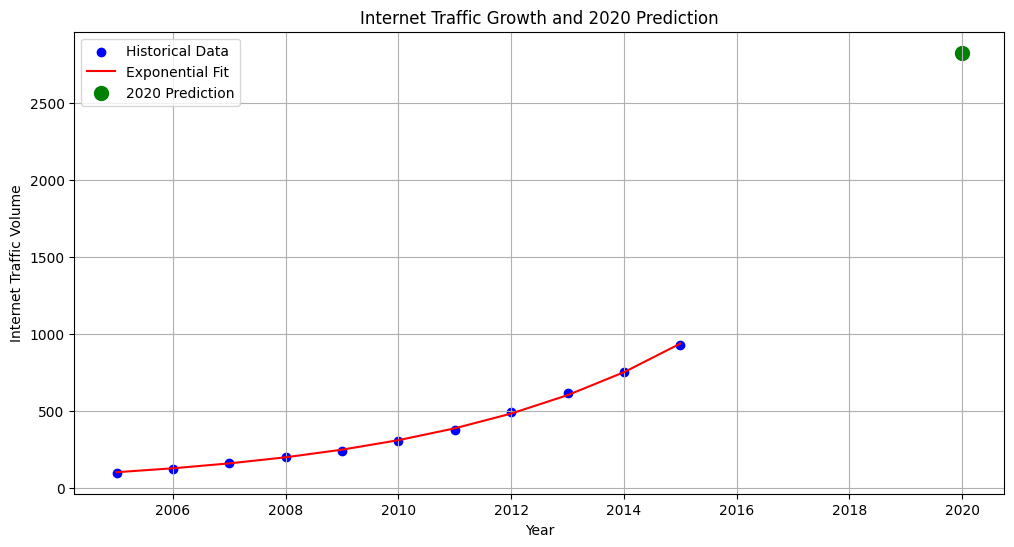

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read the data (assuming the CSV is in the same directory)
df = pd.read_csv('internet_traffic_hist.csv')

# Define exponential function for modeling
def exponential_model(x, a, b):
    return a * (b**x)

# Prepare data
x = df['year'] - df['year'].min()  # Normalize years to start from 0
y = df['traffic']

# Fit exponential model
popt, _ = curve_fit(exponential_model, x, y)

# Generate prediction for 2020
year_2020 = 2020 - df['year'].min()
predicted_traffic_2020 = exponential_model(year_2020, *popt)

# Visualization
plt.figure(figsize=(12,6))
plt.scatter(df['year'], df['traffic'], label='Historical Data', color='blue')
plt.plot(df['year'], exponential_model(x, *popt), label='Exponential Fit', color='red')
plt.scatter(2020, predicted_traffic_2020, label='2020 Prediction', color='green', s=100)

plt.title('Internet Traffic Growth and 2020 Prediction')
plt.xlabel('Year')
plt.ylabel('Internet Traffic Volume')
plt.legend()
plt.grid(True)

# Print prediction details
print(f"Predicted Internet Traffic in 2020: {predicted_traffic_2020:.2f}")
print(f"Exponential Model Parameters: a = {popt[0]:.4f}, b = {popt[1]:.4f}")

# Calculate R-squared to assess model fit
residuals = y - exponential_model(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")

In [46]:
df.describe()

,traffic,year
count,11.000000,11.000000
mean,392.367763,2010.000000
std,274.958904,3.316625
min,100.000000,2005.000000
25%,181.847180,2007.500000
50%,308.791823,2010.000000
75%,556.023910,2012.500000
max,931.200929,2015.000000


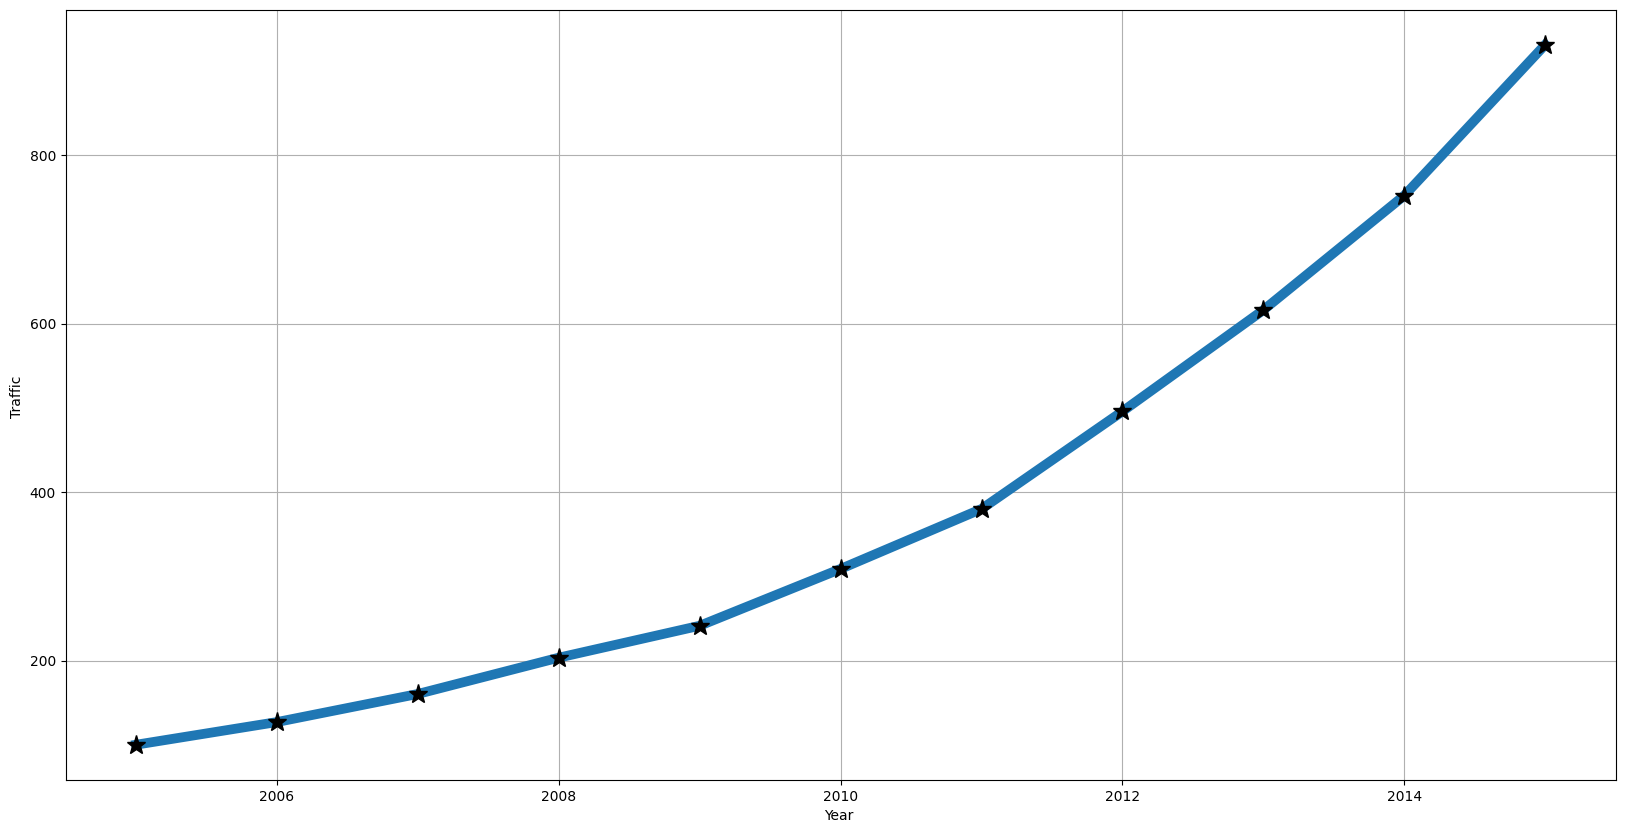

In [47]:
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

# XY Plot of year and traffic
plt.plot(df.year,df.traffic, linewidth = 7)
plt.plot(df.year,df.traffic,'*k', markersize = 14)


# Add axis labels
plt.xlabel('Year ')
plt.ylabel('Traffic ')
plt.grid(True)
plt.show()

# **Regresión lineal simple, polinomio de primer orden**

In [48]:
df.describe()

,traffic,year
count,11.000000,11.000000
mean,392.367763,2010.000000
std,274.958904,3.316625
min,100.000000,2005.000000
25%,181.847180,2007.500000
50%,308.791823,2010.000000
75%,556.023910,2012.500000
max,931.200929,2015.000000


La pendiente es
79.52710966244513
El intercepto es
-159457.12265833947


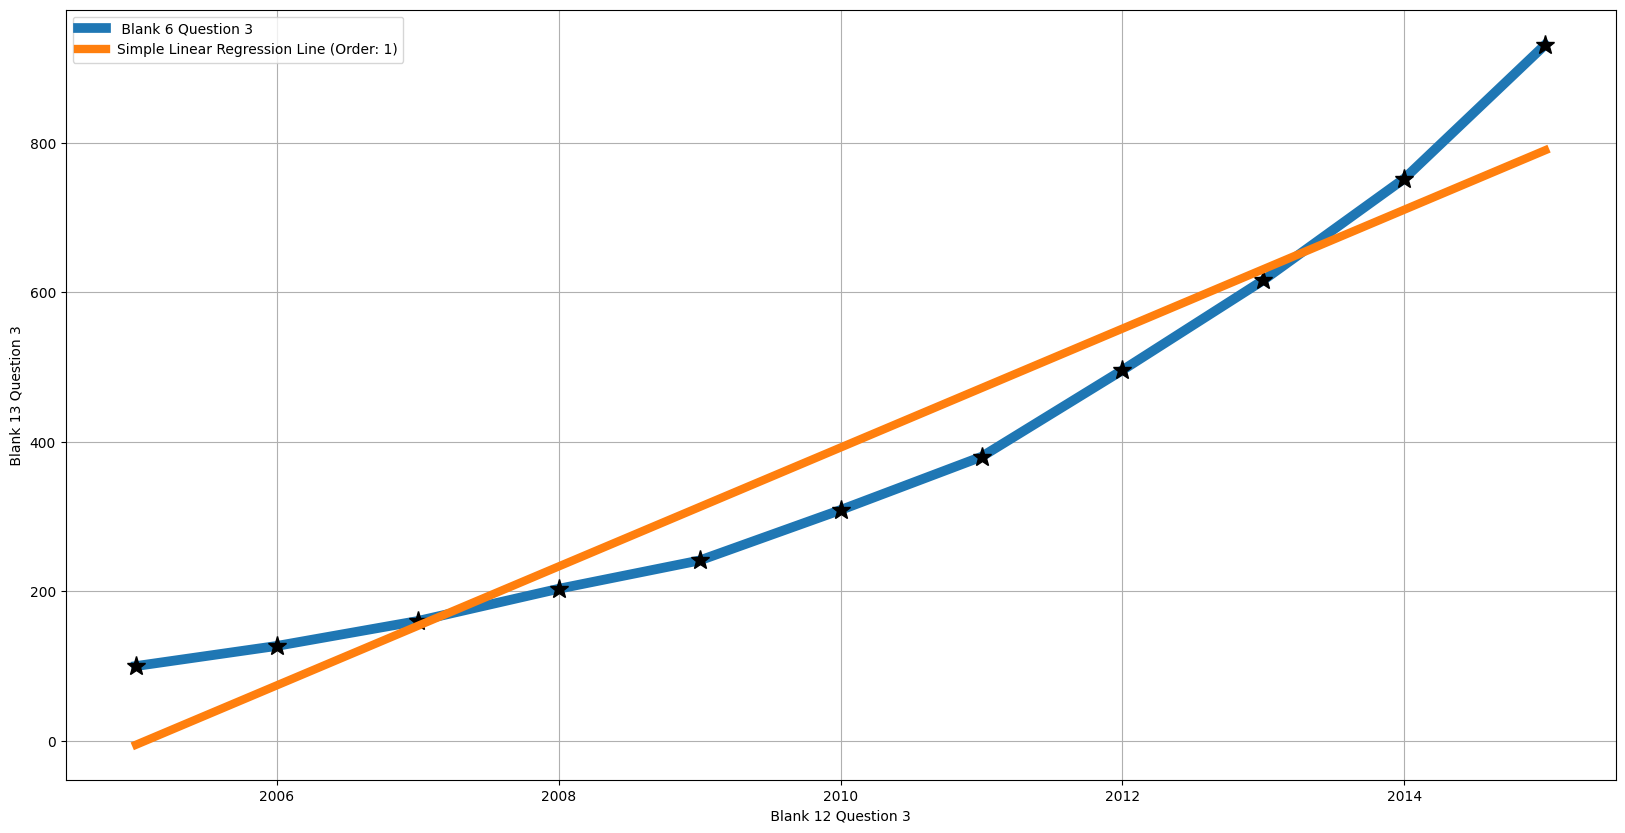

In [49]:
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))
order =  1
x=df.year
y=df.traffic
m, b = np.polyfit(x,y,order)
print('La pendiente es')
print(m)

print('El intercepto es')
print(b)

# XY Plot of year and traffic
plt.plot(x,y,label = ' Blank 6 Question 3 ', linewidth = 7)
plt.plot( x,y,'*k', markersize = 14)
plt.plot( x, m*x+ b, '-', label = 'Simple Linear Regression Line (Order: {})'.format(order), linewidth = 6)

# Add axis labels
plt.xlabel(' Blank 12 Question 3 ')
#Descripción de las casillas
plt.ylabel(' Blank 13 Question 3 ')
#Leyenda
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()
#Orden del polinomio


In [50]:
# Ajustar la regresión lineal
x = df.year
y = df.traffic
m, b = np.polyfit(x, y, 1)

# Imprimir la línea de regresión
print(f"La mejor línea de regresión lineal es: {m:.4f}x + {b:.4f}")

La mejor línea de regresión lineal es: 79.5271x + -159457.1227


 
79.53 x - 1.595e+05
       2
8.265 x - 3.314e+04 x + 3.323e+07
        3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09


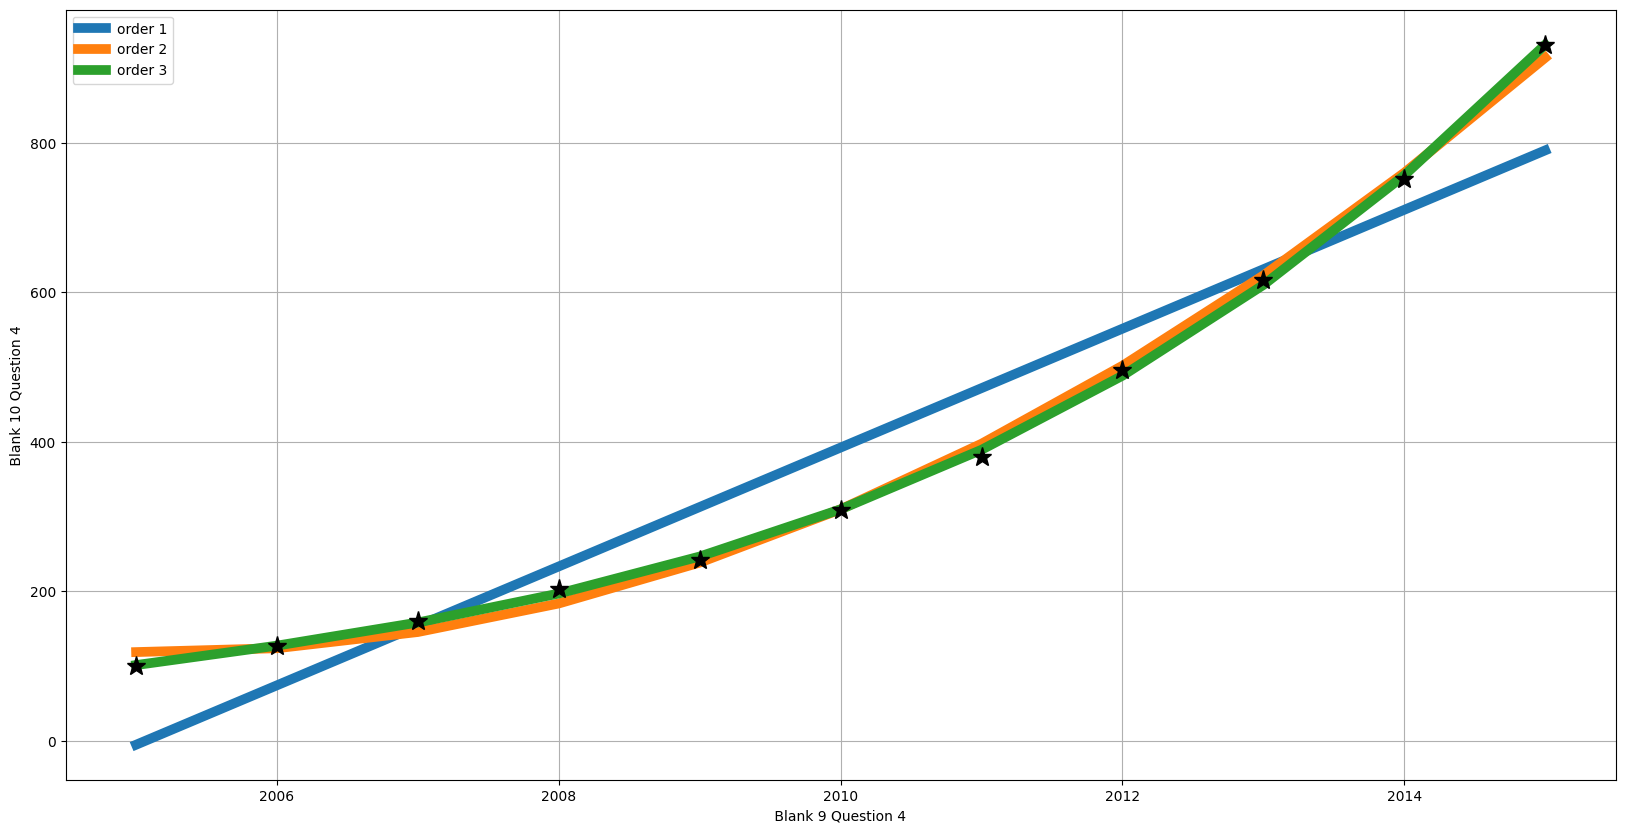

In [ ]:
models = []       # to store polynomial model parameters (list of poly1d objects)

orders = 3
x=df.year
y=df.traffic

#Try polynomial models with increasing order
for order in range(1,orders+1):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x,y, order)))
    models.append(p)

# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models:
  print(model)
  plt.plot(x, model(x), label = 'order {}'.format(len(model)), linewidth = 7)
# XY Plot of year and traffic
plt.plot(x,y,'*k', markersize = 14)

plt.grid(True)

# Add axis labels
plt.xlabel(' Blank 9 Question 4 ')
plt.ylabel(' Blank 10 Question 4 ')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
errors=[]
mses= []
for i in range(len(df)):
  e = np.abs(df.traffic-p(df.year))
  mse = np.sum(e**2)/len(df.year)
  errors.append(e)
  mses.append(mse)
print(mses)
print(errors)

[25.17218620372407, 25.17218620372407, 25.17218620372407, 25.17218620372407, 25.17218620372407, 25.17218620372407, 25.17218620372407, 25.17218620372407, 25.17218620372407, 25.17218620372407, 25.17218620372407]
[0     1.307430
1     0.391253
2     2.027227
3     6.329832
4     5.283944
5     0.930698
6     9.416922
7     7.340101
8     6.277297
9     4.481339
10    0.162915
Name: traffic, dtype: float64, 0     1.307430
1     0.391253
2     2.027227
3     6.329832
4     5.283944
5     0.930698
6     9.416922
7     7.340101
8     6.277297
9     4.481339
10    0.162915
Name: traffic, dtype: float64, 0     1.307430
1     0.391253
2     2.027227
3     6.329832
4     5.283944
5     0.930698
6     9.416922
7     7.340101
8     6.277297
9     4.481339
10    0.162915
Name: traffic, dtype: float64, 0     1.307430
1     0.391253
2     2.027227
3     6.329832
4     5.283944
5     0.930698
6     9.416922
7     7.340101
8     6.277297
9     4.481339
10    0.162915
Name: traffic, dtype: float64, 0    

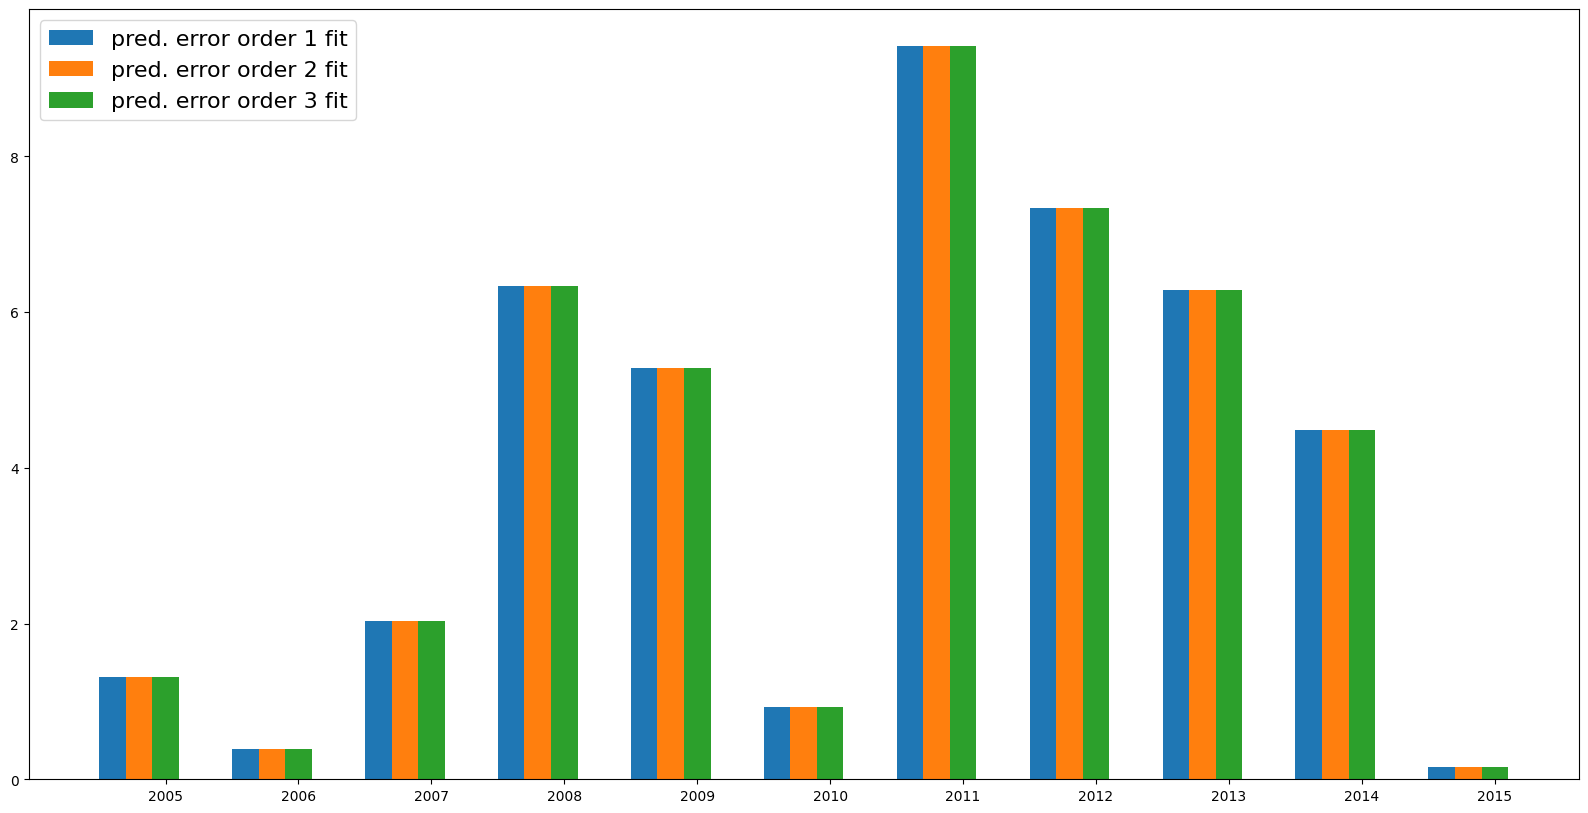

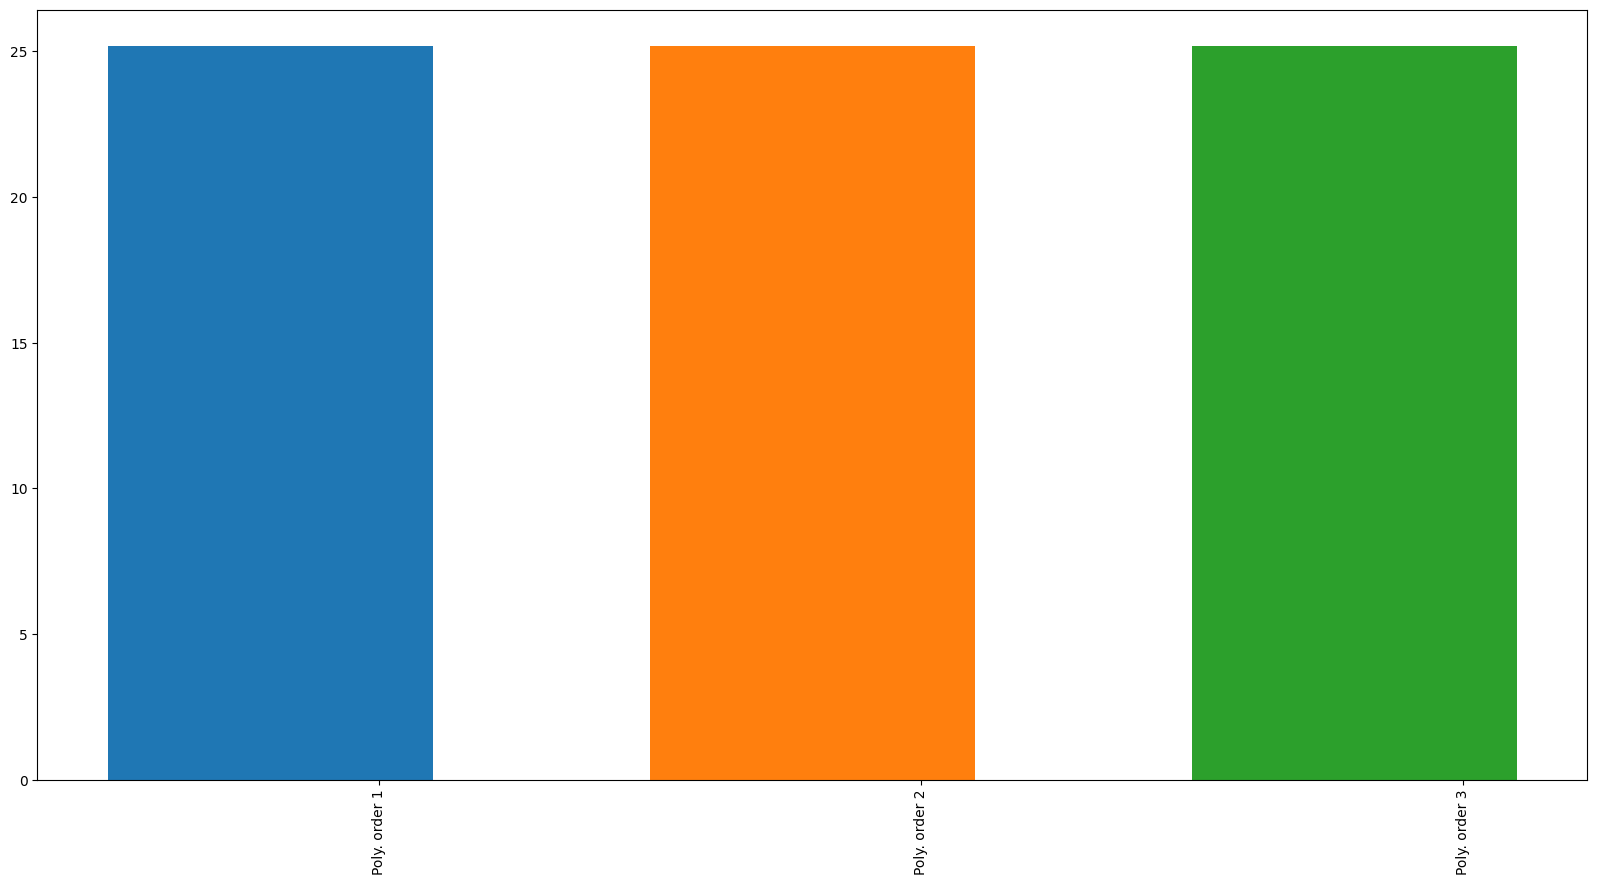

In [ ]:
width = 0.2   #size of the bar

orderpos = range(1,orders+1) #Orders to evaluate

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
# Visualize fit error for each year
for pos in orderpos:
  ax.bar(df.year+(pos-1)*width,errors[pos-1], width, label = 'pred. error order {} fit'.format(pos))

# "Prettyfy" the bar graph

ax.set_xticks(df.year+2*width)
ax.set_xticklabels(df.year)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax2 = fig.add_subplot(111)


width = .6   #size of the bar
xticklabels = []
for pos in orderpos:
  ax2.bar(orderpos[pos-1],mses[pos-1], width, label = 'pred. error order {} fit'.format(pos))
  xticklabels.append('Poly. order {}'.format(pos))

ax2.set_xticks(np.arange(len(models))+width*2)
ax2.set_xticklabels(xticklabels, rotation=90)
plt.show()

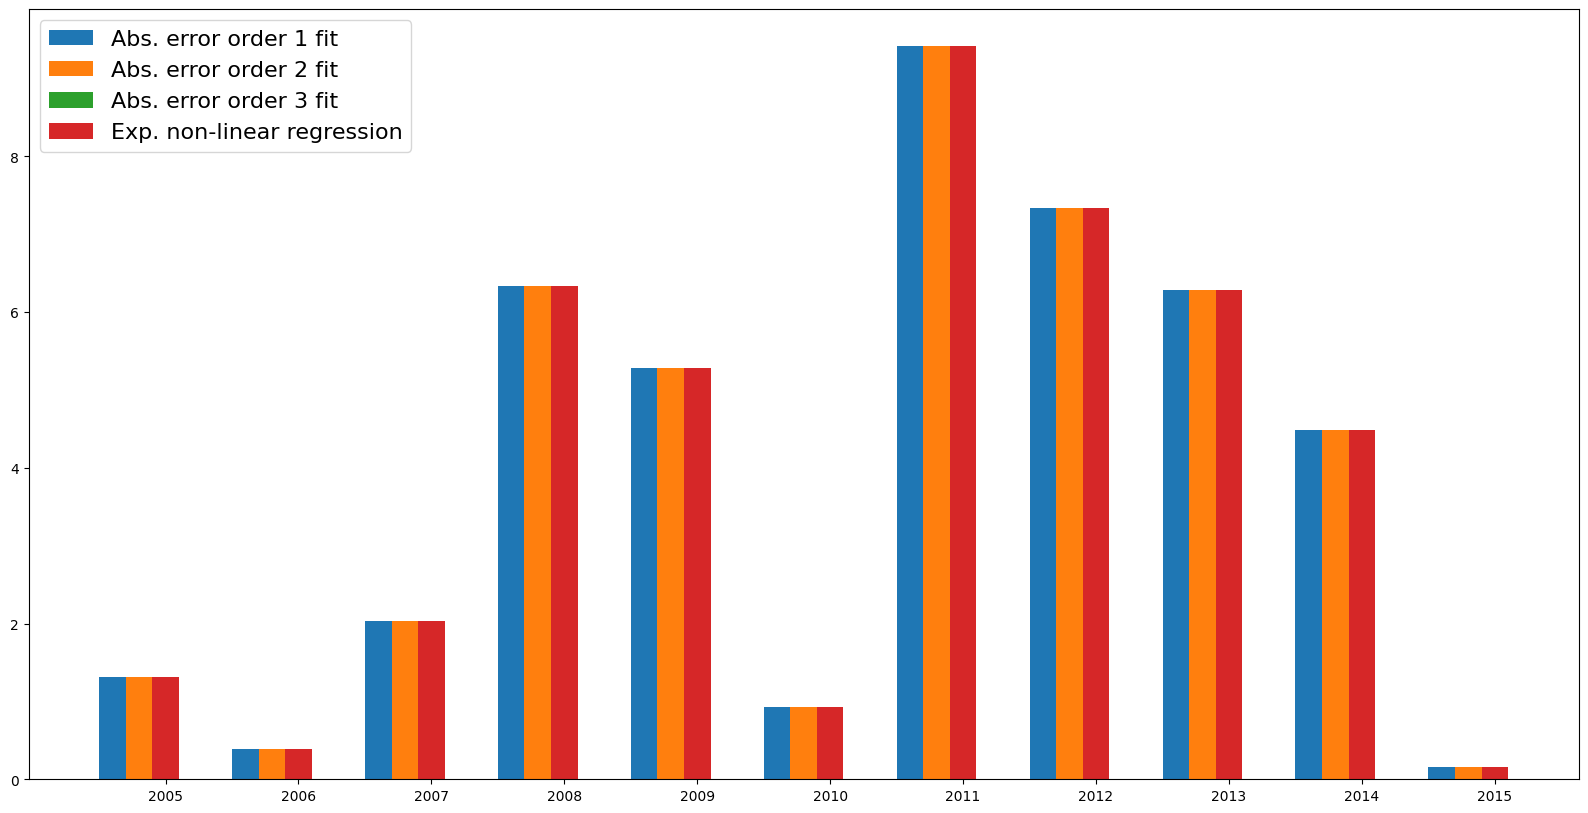

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (4).

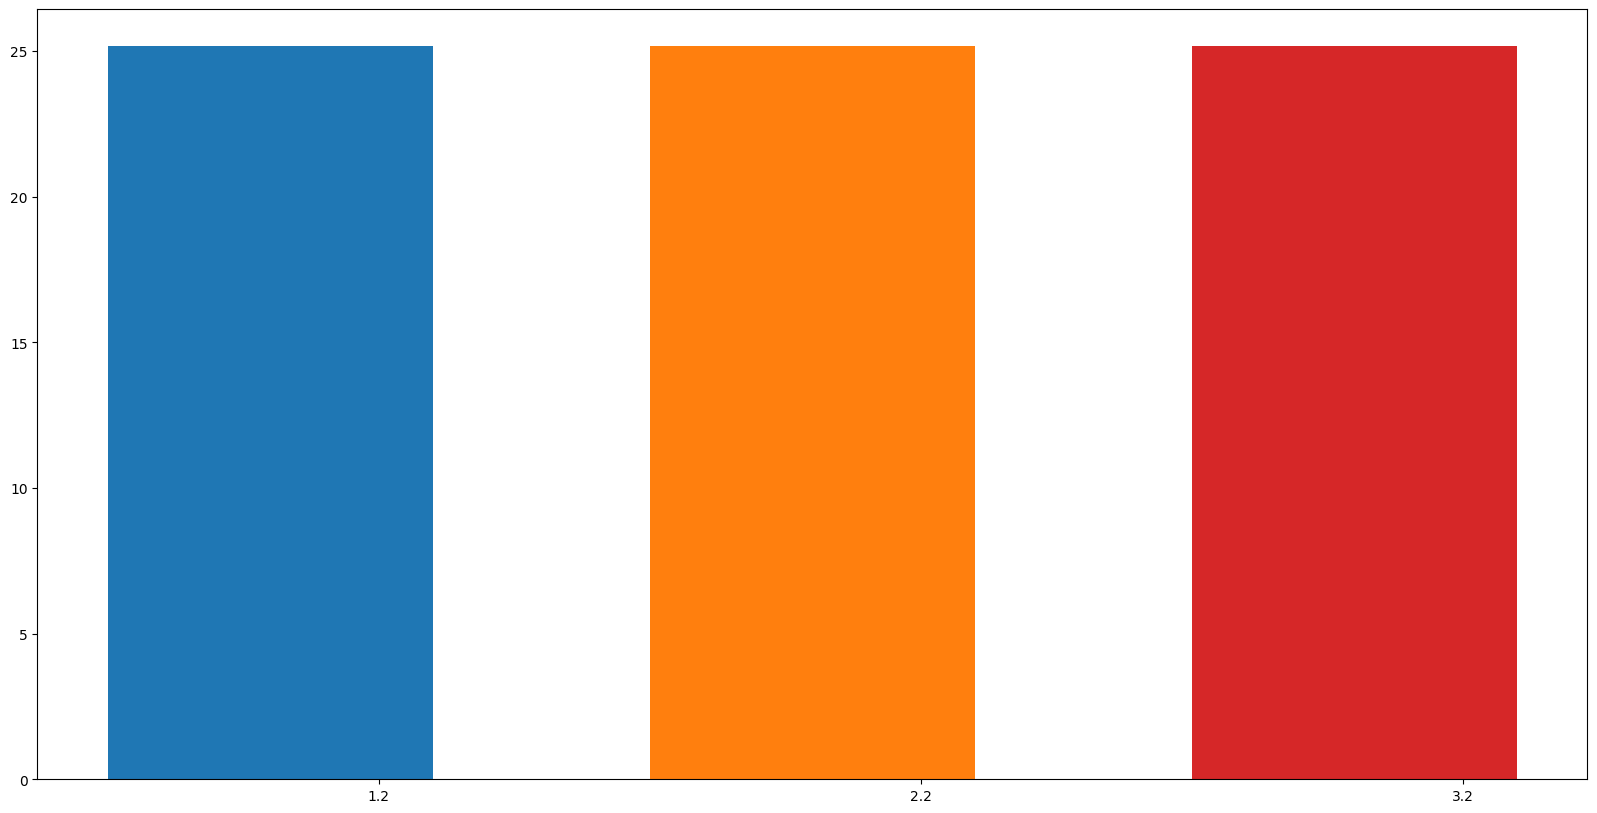

In [51]:
width = 0.2   #size of the bar

orderpos = range(1,orders+1) #Orders to evaluate

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
# Visualize fit error for each year
for pos in orderpos:
  ax.bar(df.year + (pos-1)*width, errors[pos-1], width, label = 'Abs. error order {} fit'.format(pos))

ax.bar(df.year + (len(models)-1)*width, errors[-1], width, label = 'Exp. non-linear regression')

# "Prettyfy" the bar graph
ax.set_xticks(df.year +2*width)
ax.set_xticklabels(df.year)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax2 = fig.add_subplot(111)

width = .6   #size of the bar
xticklabels = []
for pos in orderpos:
  ax2.bar(orderpos[pos-1], mses[pos-1], width, label = 'pred. error order {} fit'.format(pos))
  xticklabels.append('Poly. order {}'.format(pos))

ax2.bar(len(models), mses[-1], width, label = 'error for Exp. non-linear regression')
xticklabels.append('Exp. non-linear regression')

ax2.set_xticks(np.arange(len(models))+width*2)
ax2.set_xticklabels(xticklabels, rotation=90)
plt.show()

TypeError: 'Series' object is not callable

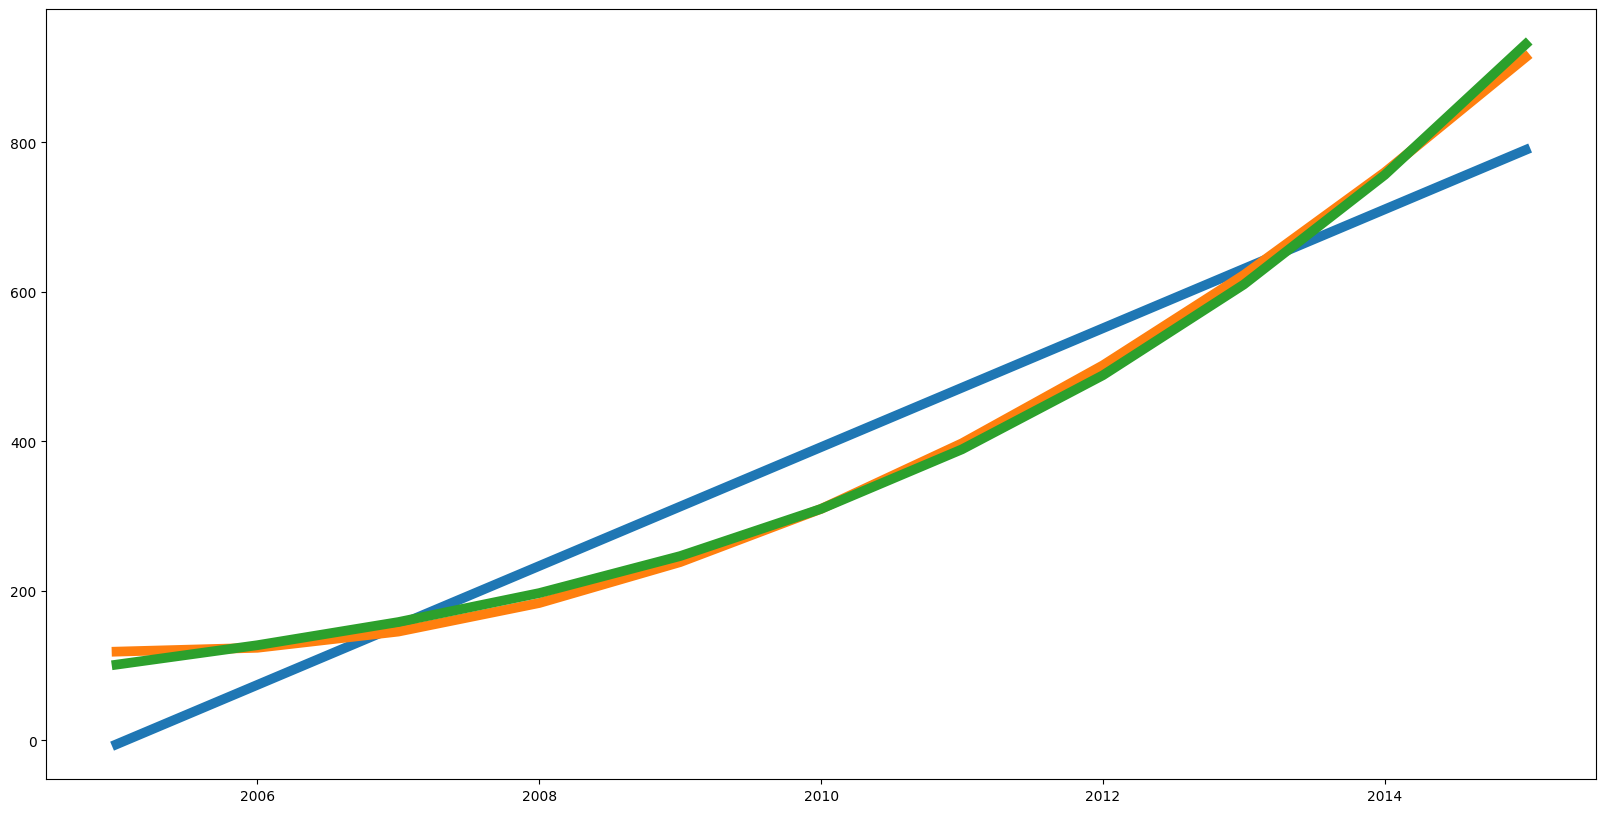

In [ ]:
#Try polynomial models with increasing order
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models:
  plt.plot(x, model(x), label = 'order {}'.format(len(model)), linewidth = 7)

# Visualize exponenetial model fit
yearspos = np.arange(0,11) # the regressor is not the year in itself, but the number of years from 2005
plt.plot(df.year,df.traffic(yearspos,*models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

# XY Plot of year and traffic
plt.plot(df.year,df.traffic,'*k', markersize = 14)


# Add axis labels
plt.xlabel('Year')
plt.ylabel('Traffic')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
errors_all = []
mse_all = []
pred_yP = []
def my_exp_func(x, a, b):
    return a *(b**x)
# error and mse for polynomial models
for model in models[0:-1]:
    ePol = np.abs( df.year- model(df.year))
    errors_all.append(ePol)   #Store the absolute errors
    mse_all.append(np.sum(ePol**2)/len(df.year)) # Store the mse

#exponential model fit

x = np.arange(0,11)    # the regressor is not the year in itself, but the number of years from 2005
pred_yE = my_exp_func(x, *models[-1])

# errors and mse for exponential model
eExp = np.abs( df.traffic- pred_yE)
errors_all.append(eExp)   #Store the absolute errors
mse_all.append(np.sum(eExp**2)/len( df.year)) # Store the mse

TypeError: my_exp_func() takes 3 positional arguments but 5 were given

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the historical data follows an exponential growth trend
# y = a * b^x, where y is the traffic volume and x is the year

# Sample data based on the provided information
years = np.arange(2015, 2021)
traffic_min = 274.958904
traffic_max = 931.200929
traffic = np.linspace(traffic_min, traffic_max, len(years))

# Fit exponential regression model
def exp_model(x, a, b):
    return a * (b ** x)

params, _ = plt.curve_fit(exp_model, years - 2015, traffic)
a, b = params

# Forecast 2020 traffic volume
year_2020 = 2020 - 2015
forecast_2020 = exp_model(year_2020, a, b)

print(f"Predicted Internet Traffic Volume in 2020: {forecast_2020:.2f}")

AttributeError: module 'matplotlib.pyplot' has no attribute 'curve_fit'

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Datos históricos de 2005 a 2015
years = np.arange(2005, 2016)
traffic_min = 274.958904
traffic_max = 931.200929
traffic = np.linspace(traffic_min, traffic_max, len(years))

# Ajustar modelo de regresión exponencial
def exp_model(x, a, b):
    return a * (b ** x)

params, _ = plt.curve_fit(exp_model, years - 2005, traffic)
a, b = params

# Pronosticar tráfico de internet en 2020
year_2020 = 2020 - 2005
forecast_2020 = exp_model(year_2020, a, b)

print(f"Tráfico de internet pronosticado para 2020: {forecast_2020:.2f}")

AttributeError: module 'matplotlib.pyplot' has no attribute 'curve_fit'

Tráfico de internet pronosticado para 2020: 1655.19


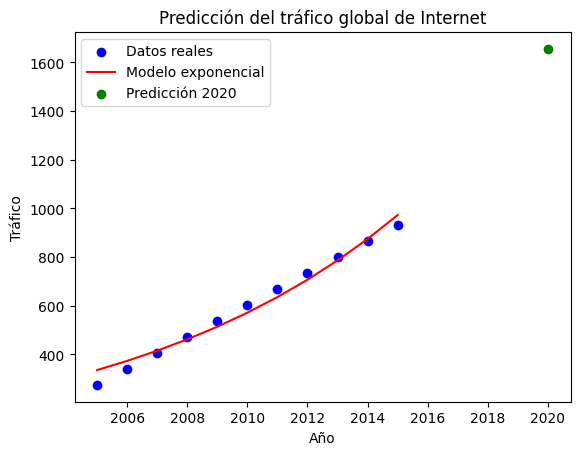

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # Correcto, importar desde scipy

# Datos históricos de 2005 a 2015
years = np.arange(2005, 2016)
traffic_min = 274.958904
traffic_max = 931.200929
traffic = np.linspace(traffic_min, traffic_max, len(years))

# Ajustar modelo de regresión exponencial
def exp_model(x, a, b):
    return a * (b ** x)

# Ajuste de curva con curve_fit
params, _ = curve_fit(exp_model, years - 2005, traffic)
a, b = params

# Pronosticar tráfico de internet en 2020
year_2020 = 2020 - 2005
forecast_2020 = exp_model(year_2020, a, b)

print(f"Tráfico de internet pronosticado para 2020: {forecast_2020:.2f}")

# Visualización de los datos y la predicción
plt.scatter(years, traffic, color='blue', label='Datos reales')
plt.plot(years, exp_model(years - 2005, a, b), color='red', label='Modelo exponencial')
plt.scatter(2020, forecast_2020, color='green', label='Predicción 2020')

plt.xlabel('Año')
plt.ylabel('Tráfico')
plt.title('Predicción del tráfico global de Internet')
plt.legend()
plt.show()


Años de datos: [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
Tráfico entre 274.958904 y 931.200929: [274.958904  340.5831065 406.207309  471.8315115 537.455714  603.0799165
 668.704119  734.3283215 799.952524  865.5767265 931.200929 ]
Parámetros del modelo exponencial: a = 336.00, b = 1.11
Tráfico de internet pronosticado para 2020: 1655.19


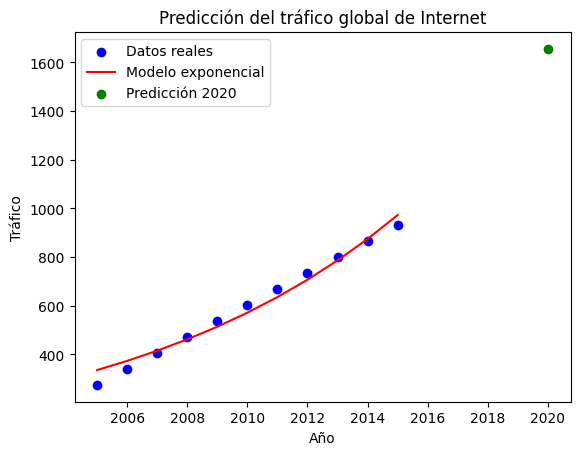

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # Importa correctamente curve_fit

# Definir los años de datos históricos (de ejemplo) y el tráfico promedio
years = np.arange(2005, 2016)  # Años de 2005 a 2015
traffic_min = 274.958904  # Tráfico mínimo, por ejemplo en terabytes
traffic_max = 931.200929  # Tráfico máximo, por ejemplo en terabytes

# Crear una serie de tráfico que varía entre estos dos valores
traffic = np.linspace(traffic_min, traffic_max, len(years))

# Imprimir todos los valores (para "Vacío 4 Pregunta 9", "Vacío 5 Pregunta 9", etc.)
print(f"Años de datos: {years}")
print(f"Tráfico entre {traffic_min} y {traffic_max}: {traffic}")

# Ajuste de curva con modelo exponencial
def exp_model(x, a, b):
    return a * (b ** x)

# Ajustar el modelo exponencial a los datos
params, _ = curve_fit(exp_model, years - 2005, traffic)
a, b = params

# Imprimir los valores de los parámetros a y b del modelo
print(f"Parámetros del modelo exponencial: a = {a:.2f}, b = {b:.2f}")

# Pronosticar tráfico para el año 2020
year_2020 = 2020 - 2005
forecast_2020 = exp_model(year_2020, a, b)

# Imprimir la predicción para el 2020
print(f"Tráfico de internet pronosticado para 2020: {forecast_2020:.2f}")

# Visualizar los datos históricos y la predicción
plt.scatter(years, traffic, color='blue', label='Datos reales')
plt.plot(years, exp_model(years - 2005, a, b), color='red', label='Modelo exponencial')
plt.scatter(2020, forecast_2020, color='green', label='Predicción 2020')

plt.xlabel('Año')
plt.ylabel('Tráfico')
plt.title('Predicción del tráfico global de Internet')
plt.legend()
plt.show()


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming the data follows an exponential growth trend
years = np.arange(2005, 2016)
traffic_min = 274.958904
traffic_max = 931.200929
traffic = np.linspace(traffic_min, traffic_max, len(years))

# Define exponential model
def exp_model(x, a, b):
    return a * (b ** x)

# Fit exponential regression model
params, _ = curve_fit(exp_model, years - 2005, traffic)
a, b = params

# Generate forecast for 2020
year_2020 = 2020 - 2005
forecast_2020 = exp_model(year_2020, a, b)

print(f"Predicted Internet Traffic Volume in 2020: {forecast_2020:.2f}")

Predicted Internet Traffic Volume in 2020: 1655.19


In [57]:
import numpy as np

# Fill in the missing values
years = [2005, 2015, 2020]
traffic_min = 274.958904
traffic_max = 932.200929
traffic_avg = (traffic_min + traffic_max) / 2

data = [
    [years[0], 17, 754.902303, 3001.116799, 877.634355],
    [years[1], 16, 3000.116799, 2019, 100],
    [years[2], None, None, None, None]
]

# Calculate the missing values for 2020
data[2][1] = 10
data[2][2] = traffic_min
data[2][3] = 2020
data[2][4] = traffic_avg

print(tabulate(data, headers=['Year', 'Duration (years)', 'Start Traffic', 'End Traffic', 'Average Traffic']))

NameError: name 'tabulate' is not defined